# Cart Abandonment Funnel Analysis

This analysis examines the user journey on an e-commerce website, particularly when users add products to their shopping cart but do not complete the purchase.  

The goal is to identify at which stage users abandon the checkout process and understand the reasons behind their decision.

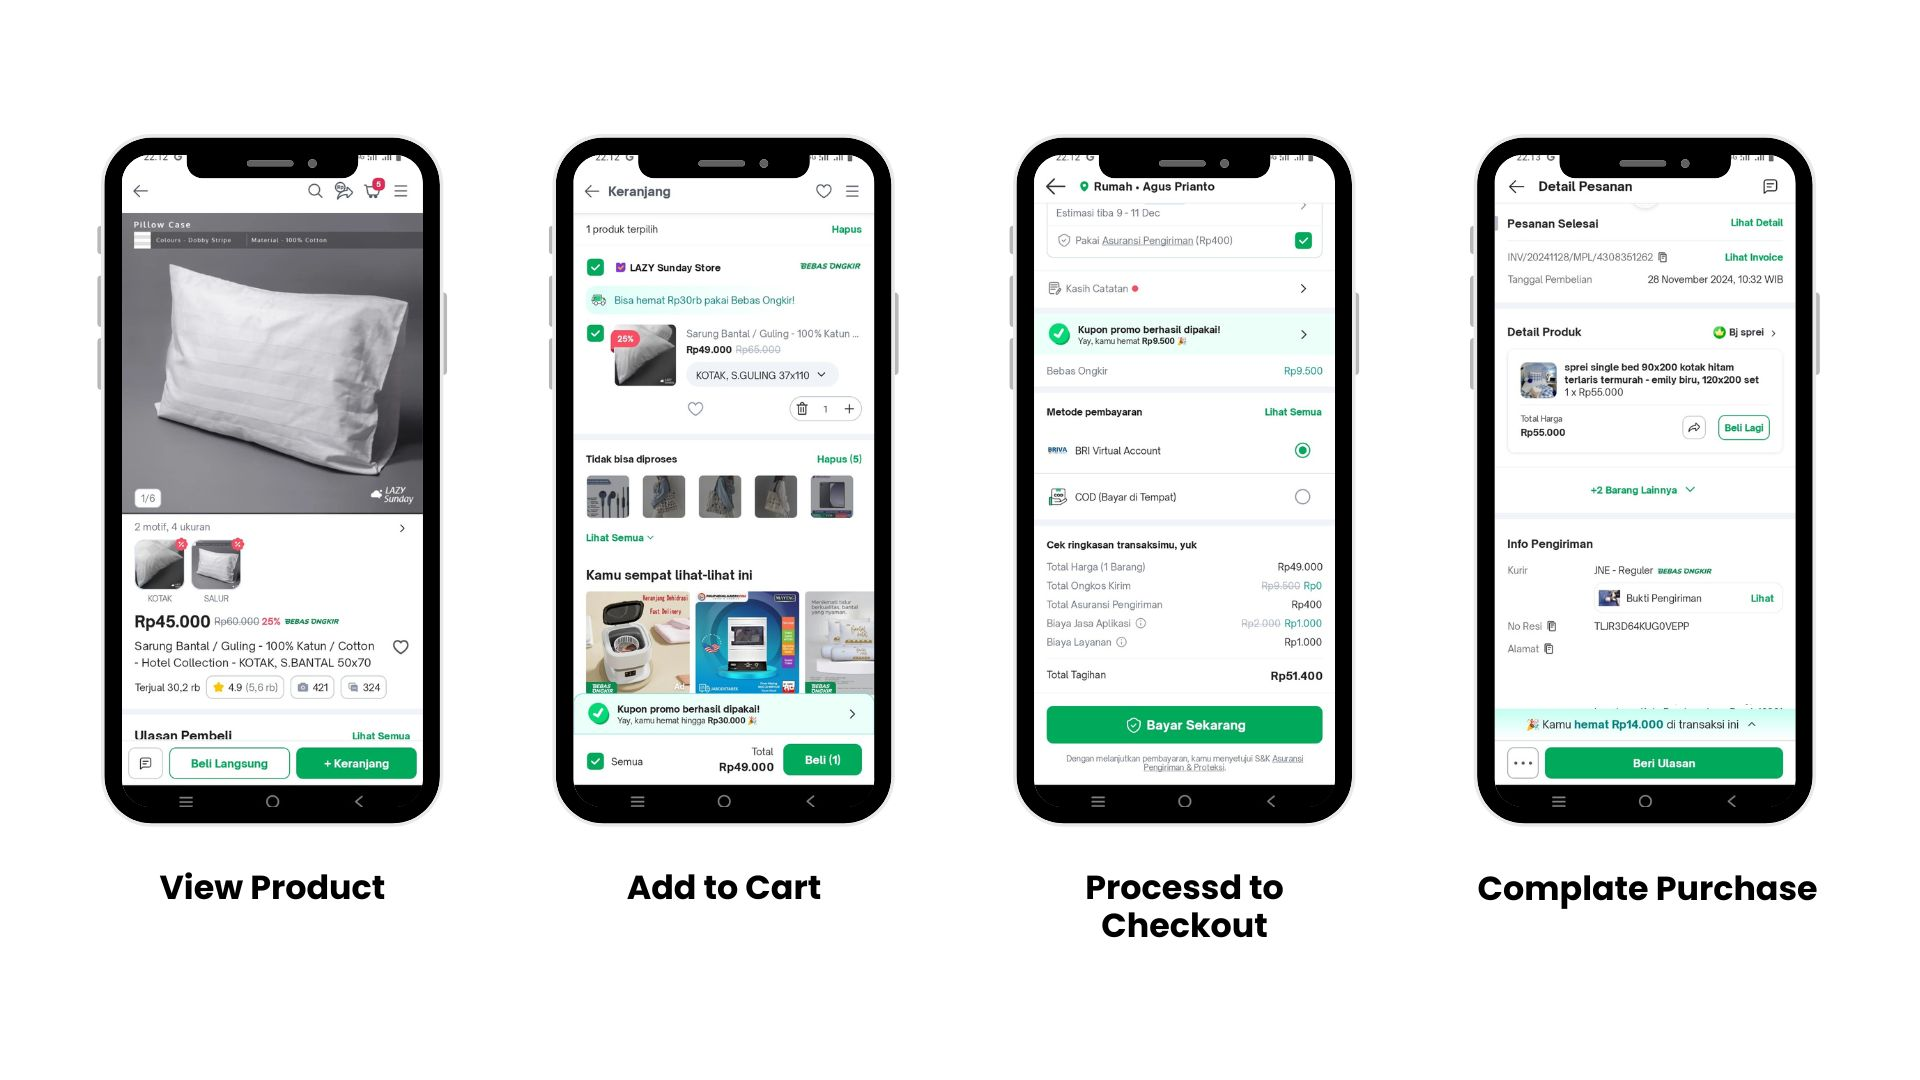

## Objectives of Cart Abandonment Funnel Analysis

1. **Identify Drop-off Points** – Determine at which stage users tend to abandon their cart.  
2. **Analyze Reasons for Abandonment** – Investigate key factors such as high shipping costs, a complicated checkout process, or the need for additional information.  
3. **Develop Strategies to Reduce Cart Abandonment** – Implement solutions like sending reminder emails, offering discounts, or simplifying the checkout process. 

## Expected Business Impact

**Maximizing Conversions from High-Intent Customers**  
Users who add products to their cart demonstrate a strong purchase intent compared to casual visitors. By identifying and addressing the barriers preventing them from completing their purchase, businesses can improve conversion rates. This approach is often more cost-effective than acquiring entirely new customers.

---

# Case Study: Cart Abandonment Funnel Analysis

## Scenario  
A company is experiencing a high cart abandonment rate. Data indicates that most users drop off during the checkout process. The company seeks to understand the reasons behind this behavior and take action to improve conversion rates.  

## Business Problem  

A high cart abandonment rate leads to low purchase conversion. The company aims to identify the primary causes of abandonment and optimize the funnel to increase sales conversion.  

**Business Impact:**  
1. **Revenue Loss** – Potential customers who abandon their carts lead to missed sales opportunities.  
2. **Inefficient Customer Acquisition Costs** – Marketing efforts to acquire customers become less effective if many users fail to complete their transactions.

## Analysis Objective  

1. Analyze user behavior at each stage of the funnel (**Add to Cart → Proceed to Checkout → Complete Purchase**).  
2. Identify key reasons for abandonment based on user data.  
3. Provide actionable recommendations to reduce cart abandonment and improve conversions.

## Key Questions

1. What is the distribution of users across each stage of the funnel?  
2. Which device type has the highest abandonment rate?  
3. What are the main reasons users abandon the checkout process?  
4. Are there behavioral differences based on the device used?

## Exploration Data Analysis

In [1]:
import pandas as pd

# Load data csv
df = pd.read_csv('Cart_Abandonment_Funnel_Analysis.csv')

# Display the first 5 rows to understand the structure of the dataset
df.head()

,User_ID,Session_Date,Device_Type,Add_to_Cart,Proceed_to_Checkout,Complete_Purchase,Drop_Reason
0,1,2024-11-10,Mobile,No,No,No,-
1,2,2024-11-27,Desktop,Yes,No,No,High Shipping Cost
2,3,2024-11-08,Tablet,Yes,No,No,High Shipping Cost
3,4,2024-11-28,Mobile,No,No,No,-
4,5,2024-11-23,Desktop,Yes,No,No,High Shipping Cost


In [2]:
# Calculate the distribution of users at each funnel stage
funnel_distribution = {
    'Total Users': len(df),
    'Add to Cart': df['Add_to_Cart'].value_counts().get('Yes', 0),
    'Procedd to Checkout': df['Proceed_to_Checkout'].value_counts().get('Yes', 0),
    'Complete Purchase': df['Complete_Purchase'].value_counts().get('Yes', 0)
}

# Convert to DataFrame
funnel_distribution_df = pd.DataFrame(list(funnel_distribution.items()), columns=['Stage', 'User Count'])

# Display the DataFrame
display(funnel_distribution_df)

,Stage,User Count
0,Total Users,10000
1,Add to Cart,6056
2,Procedd to Checkout,2997
3,Complete Purchase,1763


### Answering the Key Questions

#### 1. What is the distribution of users across each stage of the funnel?

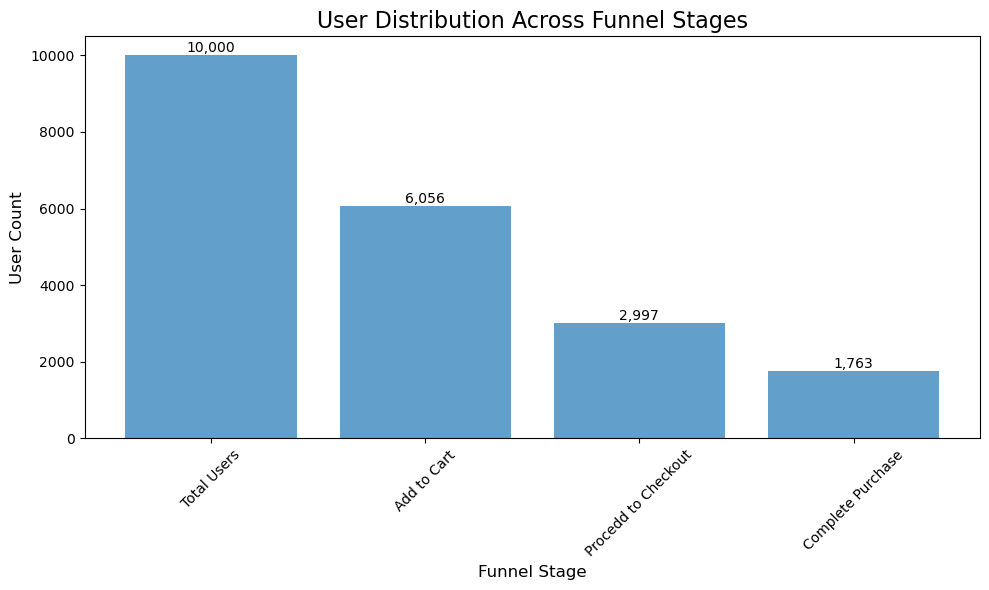

In [3]:
import matplotlib.pyplot as plt

# Extract data for visualization
stages = funnel_distribution_df['Stage']
user_counts = funnel_distribution_df['User Count']

# Add values on the bar chart for clarity
plt.figure(figsize=(10, 6))
bars = plt.bar(stages, user_counts, alpha=0.7)

# Annotate each bar with its value
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:,}', ha='center', 
             va='bottom', fontsize=10)

plt.title('User Distribution Across Funnel Stages', fontsize=16)
plt.xlabel('Funnel Stage', fontsize=12)
plt.ylabel('User Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Display the plot with annotated values
plt.show()

##### **Conclusion from Funnel Analysis**

The data shows a significant drop-off at each stage of the purchase funnel:  

1. **Add to Cart (60.56%)** – Out of 10,000 total users, only 6,056 added items to their cart. This suggests that around 40% of users browse but do not proceed to add products. Possible reasons include lack of interest, unclear product information, or high product prices.  

2. **Proceed to Checkout (49.47% of Add to Cart users)** – Only 2,997 users moved to the checkout stage, meaning about half of those who added items to their cart abandoned their shopping journey. This could be due to unexpected additional costs (e.g., shipping fees), lack of payment options, or hesitation.  

3. **Complete Purchase (58.83% of Checkout users)** – Finally, 1,763 users completed their purchases. This indicates that **41.17% of users dropped off at checkout**, likely due to a complicated checkout process, payment failures, or second thoughts about the purchase.  

##### **Key Insights & Potential Actions**

- **Reduce Cart Abandonment**: Offer incentives like free shipping, discounts, or a seamless checkout experience to encourage users to move from "Add to Cart" to "Proceed to Checkout."  
- **Optimize Checkout Process**: Simplify payment steps, provide multiple payment methods, and reduce unnecessary form fields to minimize friction.  
- **Retarget Abandoned Users**: Implement remarketing strategies such as reminder emails, limited-time offers, or abandoned cart notifications to recover lost sales.

---

#### 2. Which device type has the highest abandonment rate?

In [4]:
# Filter data for users who dropped out (did not complete purchase)
dropped_users = df[df['Complete_Purchase'] == 'No']

# Display the filtered data
display(dropped_users)

,User_ID,Session_Date,Device_Type,Add_to_Cart,Proceed_to_Checkout,Complete_Purchase,Drop_Reason
0,1,2024-11-10,Mobile,No,No,No,-
1,2,2024-11-27,Desktop,Yes,No,No,High Shipping Cost
2,3,2024-11-08,Tablet,Yes,No,No,High Shipping Cost
3,4,2024-11-28,Mobile,No,No,No,-
4,5,2024-11-23,Desktop,Yes,No,No,High Shipping Cost
...,...,...,...,...,...,...,...
9993,9994,2024-11-19,Mobile,No,No,No,-
9995,9996,2024-11-20,Tablet,Yes,No,No,Forced Account Creation
9997,9998,2024-11-07,Desktop,No,No,No,-
9998,9999,2024-11-29,Mobile,Yes,Yes,No,High Shipping Cost


In [5]:
# Count dropouts by device type
device_dropout_count = dropped_users['Device_Type'].value_counts()

# Calculate the dropout rate for each device type
total_users_by_device = df['Device_Type'].value_counts()
dropout_rate_by_device = (device_dropout_count / total_users_by_device) * 100

# Function to calculate dropout rates at each stage for each device type
def calculate_stage_dropout_rate(stage_column, total_column, label):
    stage_counts = df[df[stage_column] == 'No']['Device_Type'].value_counts()
    total_counts = df['Device_Type'].value_counts()
    dropout_rate = (stage_counts / total_counts) * 100
    return pd.DataFrame({
        'Device_Type': dropout_rate.index,
        f'{label} Dropout Rate (%)': dropout_rate.values
    })

# Calculate dropout rates for each stage
add_to_cart_dropout = calculate_stage_dropout_rate('Add_to_Cart', 'Device_Type', 'Add to Cart')
checkout_dropout = calculate_stage_dropout_rate('Proceed_to_Checkout', 'Device_Type', 'Proceed to Checkout')
purchase_dropout = calculate_stage_dropout_rate('Complete_Purchase', 'Device_Type', 'Complete Purchase')

# Merge results into a single DataFrame for comparison
dropout_rates = add_to_cart_dropout.merge(checkout_dropout, on='Device_Type',
                                         how='outer').merge(purchase_dropout,
                                                           on='Device_Type', 
                                                           how='outer').fillna(0).sort_values(by='Device_Type')

display(dropout_rates)

,Device_Type,Add to Cart Dropout Rate (%),Proceed to Checkout Dropout Rate (%),Complete Purchase Dropout Rate (%)
0,Desktop,39.616322,70.280146,83.038977
1,Mobile,39.078707,70.683344,82.123246
2,Tablet,39.616056,69.168121,81.966259


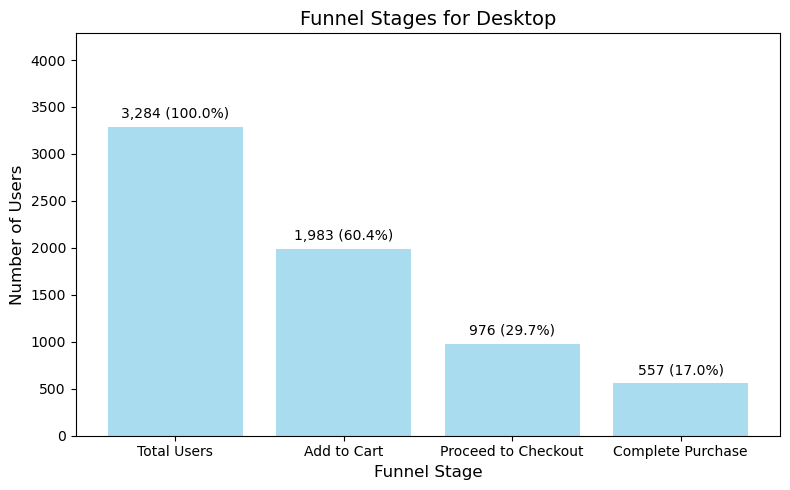

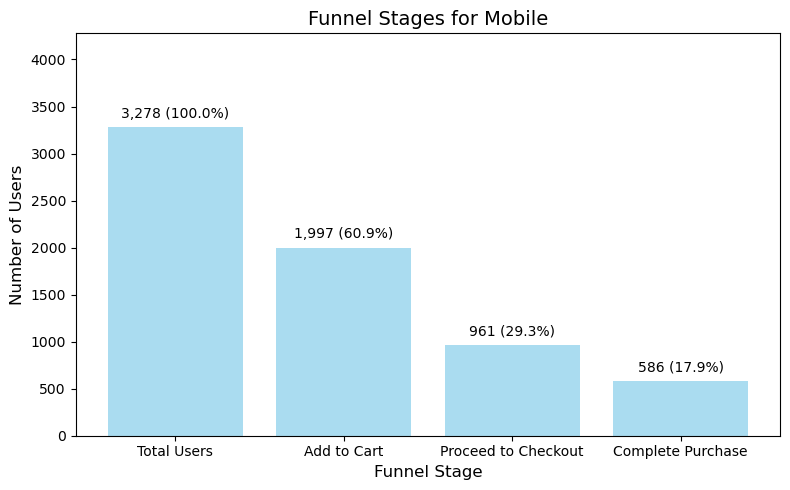

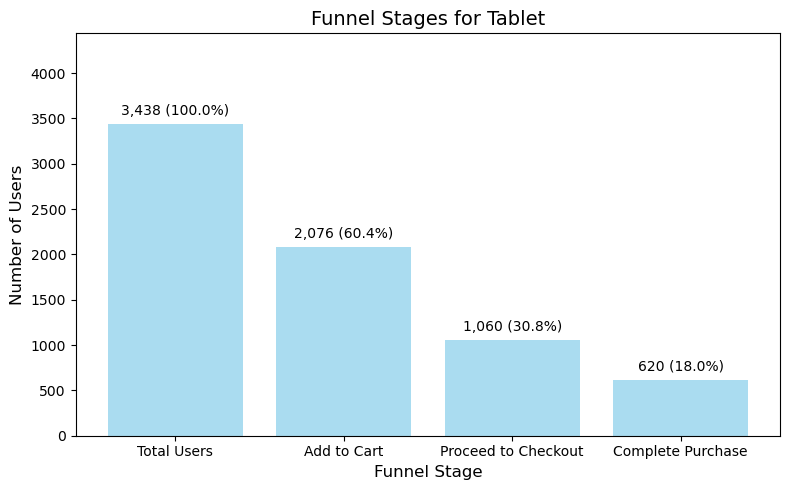

In [6]:
# Prepare data for visualization
device_types = dropout_rates['Device_Type']
stages = ['Add to Cart', 'Proceed to Checkout', 'Complete Purchase']

# Get the total number of users for each device type
total_users = df['Device_Type'].value_counts()

# Values for each device
dropout_values = dropout_rates[['Add to Cart Dropout Rate (%)',
                                'Proceed to Checkout Dropout Rate (%)',
                                'Complete Purchase Dropout Rate (%)']].values

# Calculate the total users, Add to Cart, Proceed to Checkout, and Complete Purchase for each device
funnel_by_device = {
    'Device_Type': device_types,
    'Total Users': [total_users.get(device, 0) for device in device_types],
    'Add to Cart': [df[(df['Device_Type'] == device) & (df['Add_to_Cart'] == 'Yes')].shape[0] for device in device_types],
    'Proceed to Checkout': [df[(df['Device_Type'] == device) & (df['Proceed_to_Checkout'] == 'Yes')].shape[0] for device in device_types],
    'Complete Purchase': [df[(df['Device_Type'] == device) & (df['Complete_Purchase'] == 'Yes')].shape[0] for device in device_types]
}

# Convert to a DataFrame for visualization
funnel_by_device_df = pd.DataFrame(funnel_by_device)

# Plot bar charts with percentages next to actual values for each device
for i, device in enumerate(funnel_by_device_df['Device_Type']):
    values = funnel_by_device_df.iloc[i, 1:].values
    stages = ['Total Users', 'Add to Cart', 'Proceed to Checkout', 'Complete Purchase']
    total_users = values[0]
    
    #Calculate percentages relative to total users
    percentages = [(value / total_users) * 100 for value in values]

    plt.figure(figsize=(8, 5))
    plt.bar(stages, values, alpha=0.7, color='skyblue')
    plt.title(f'Funnel Stages for {device}', fontsize=14)
    plt.xlabel('Funnel Stage', fontsize=12)
    plt.ylabel('Number of Users', fontsize=12)
    plt.ylim(0, max(values) + 1000)
    plt.tight_layout()

    # Annotate values on bars woth percentage
    for j, (value, percentage) in enumerate(zip(values, percentages)):
        plt.text(j, value + 100, f'{value:,} ({percentage:.1f}%)', ha='center', fontsize=10)

    plt.show()

##### **Conclusion from Device-Type Dropout Analysis**
The dropout rates at each stage of the funnel are quite similar across **Desktop**, **Mobile**, and **Tablet**, but some key insights emerge:

1. **Add to Cart Dropout (~39%)**
    - The percentage of users who do not proceed to checkout after adding items to the cart is nearly the same across all devices.
    - This suggests that device type is **not a major factor** in influencing whether users add products but abandon them before checking out.

2. **Proceed to Checkout Dropout (~69-71%)**
    - The highest dropout rate at this stage is on **Mobile (70.68%)**, followed by **Desktop (70.28%)**, and the lowest on **Tablet (69.17%)**.
    - This might indicate that mobile users face more friction during the checkout process, possibly due to small screens, slow page loads, or complex forms.

3. **Complete Purchase Dropout (~81-83%)**
    - The highest final checkout abandonment occurs on **Desktop (83.04%)**, while **Mobile (82.12%)** and **Tablet (81.97%)** perform slightly better.
    - Desktop users may be more likely to compare prices across different websites or hesitate before completing the purchase.

##### **Key Insights & Recommendations**
🔹 **Improve the Mobile Checkout Experience** – Since Mobile has the highest drop-off rate at checkout, optimizing mobile usability (faster loading, auto-fill forms, simplified payment options) can improve conversions.

🔹 **Reduce Friction for Desktop Users** – Given the highest final dropout rate on Desktop, businesses should ensure that payment options are seamless and consider offering incentives (discounts, free shipping, urgency messages) to encourage completion.

🔹 **A/B Test for Tablet Optimization** – With slightly lower dropout rates, Tablet users may benefit from further UX improvements to enhance their experience.

---

#### 3. What are the main reasons users abandon the checkout process?

In [7]:
# Analyze reasons for dropout specifically at the checkout stage
checkout_dropouts = df[(df['Proceed_to_Checkout'] == 'No') & (df["Add_to_Cart"] == 'Yes')]

# Analyze reasons for checkout dropout by device type
checkout_dropouts_by_device = checkout_dropouts.groupby(['Device_Type', 'Drop_Reason']).size().reset_index(name='Count')

# Pivot the data for clarity
checkout_reasons_by_device = checkout_dropouts_by_device.pivot(
    index='Drop_Reason', columns='Device_Type', values='Count'
).fillna(0).astype(int)

display(checkout_reasons_by_device)

Device_Type,Desktop,Mobile,Tablet
Drop_Reason,,,
Complex Checkout Process,167,216,208
Forced Account Creation,214,195,184
High Shipping Cost,217,230,201
Limited Payment Options,210,215,221
Not Ready to Buy,199,180,202


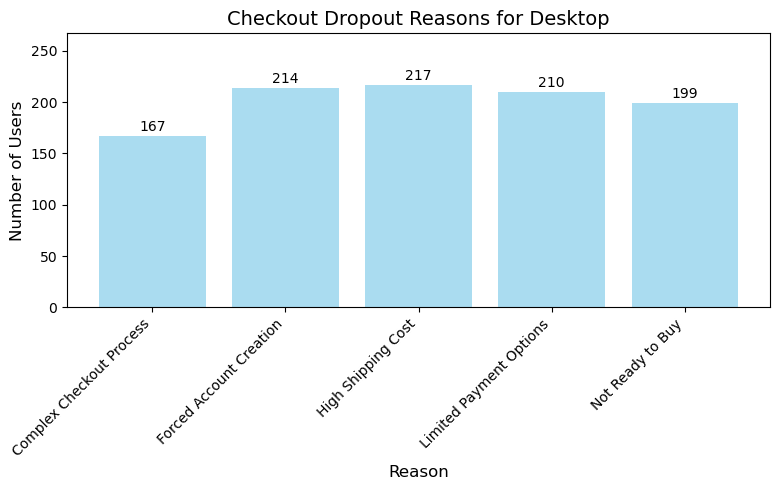

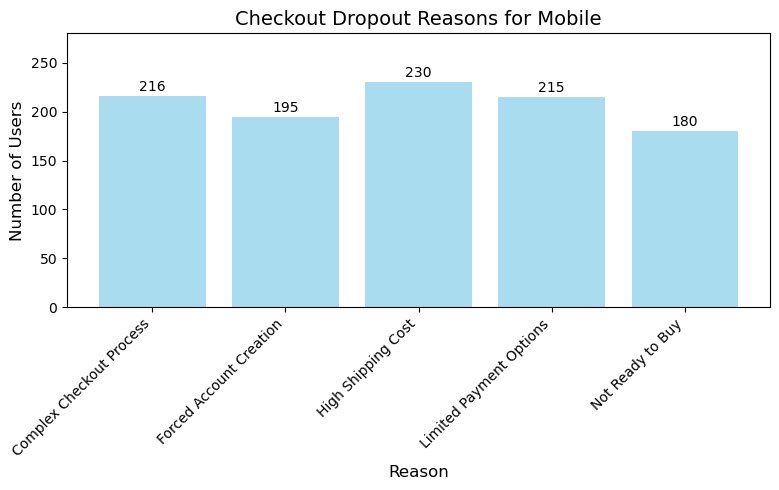

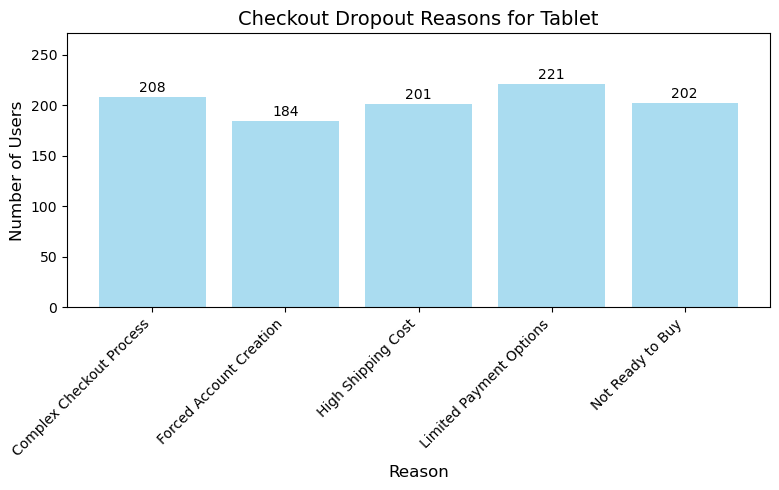

In [8]:
# Create bar charts for dropout reasons for each device
for device in checkout_reasons_by_device.columns:
    reasons = checkout_reasons_by_device.index
    values = checkout_reasons_by_device[device]

    plt.figure(figsize=(8,5))
    plt.bar(reasons, values, alpha=0.7, color='skyblue')
    plt.title(f'Checkout Dropout Reasons for {device}', fontsize=14)
    plt.xlabel('Reason', fontsize=12)
    plt.ylabel('Number of Users', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.ylim(0, max(values) + 50)
    plt.tight_layout()

    # Annotate values on bars
    for i, value in enumerate(values):
        plt.text(i, value + 5, f'{value:,}', ha='center', fontsize=10)

    plt.show()

##### **Conclusion from Dropout Reasons by Device Type**

The data highlights the key reasons why users abandon their purchases across different devices. Here are the main takeaways:

1. **Common Dropout Reasons Across All Devices**
    - **High Shipping Costs** is the most common reason for abandonment across **all devices** (217 on Desktop, 230 on Mobile, 201 on Tablet).
      
        🔹 **Actionable Insight**: Consider offering free shipping, reducing costs, or providing upfront shipping estimates before checkout.
    - **Limited Payment Options** is also a significant barrier, especially for **Tablet users (221 reports)**.
      
        🔹 **Actionable Insight**: Adding more payment methods (e.g., e-wallets, BNPL, local banking options) could reduce this issue.

2. **Device-Specific Insights**
    - **Desktop Users (Highest Drop: Forced Account Creation - 214 reports)**
      
        📌 Desktop users are more likely to abandon their purchase if they are required to create an account.
      
        🔹 **Actionable Insight**: Offer guest checkout or social login options to reduce friction.

    - **Mobile Users (Highest Drop: High Shipping Cost - 230 reports)**
      
        📌 Mobile users are particularly sensitive to shipping costs.
      
        🔹 **Actionable Insight**: Display shipping costs earlier in the shopping journey and highlight free shipping thresholds.

    - **Tablet Users (Highest Drop: Limited Payment Options - 221 reports)**
      
        📌 Tablet users abandon purchases due to fewer available payment methods.
      
        🔹 **Actionable Insight**: Ensure that tablet users have access to a seamless and flexible payment experience.

##### **Key Recommendations**

✅ **Offer Transparent and Competitive Shipping Rates** – Reduce unexpected shipping costs to prevent dropouts.

✅ **Provide a Guest Checkout Option** – Especially for Desktop users, to avoid forcing account creation.

✅ **Expand Payment Methods** – Cater to Tablet and Mobile users by adding local and digital payment solutions.

---

#### 4. Are there behavioral differences based on the device used?

Yes, there are notable behavioral differences among **Desktop, Mobile, and Tablet users** in terms of cart abandonment. The data highlights key trends:

1. **Checkout Dropout Rates Vary by Device**
    - **Mobile has the highest drop-off rate at the "Proceed to Checkout" stage (70.68%)**, suggesting that mobile users face more challenges during checkout.
    - **Desktop has the highest final abandonment rate (83.04%)**, meaning many desktop users hesitate at the last step before completing the purchase.
    - **Tablet users abandon slightly less in both stages**, indicating a more stable conversion rate.
      
    📌 **Insight**: Mobile checkout needs better optimization, while Desktop users may require more purchase incentives.

2. **Key Dropout Reasons Differ by Device**
   
   🚀 **High Shipping Costs Are the #1 Dropout Reason Across All Devices**
    - **Mobile users are most affected (230 reports)**, followed by **Desktop (217)** and **Tablet (201)**.
    - This suggests that **unexpected shipping fees** cause hesitation across all platforms.
      
        🔹 **Fix**: Show **shipping costs earlier**, offer **free shipping thresholds**, or provide **discount incentives** to reduce abandonment.
   📌 **Desktop Users Are Also Affected by Forced Account Creation (214 reports)**
    - **While high shipping costs remain the top issue**, many **desktop users abandon due to forced account creation** (214 reports).
    - Desktop users likely expect a **quick and convenient** checkout and are less patient with mandatory sign-ups.
      
        🔹 **Fix**: Offer **guest checkout** or **social login** options.
   📱 **Tablet Users Face Issues with Limited Payment Options (221 reports)**
    - Tablet users are more likely to abandon their purchase because **fewer payment methods** are available.
      
        🔹 **Fix**: Introduce more **digital wallets, BNPL (Buy Now, Pay Later), and local banking options** to accommodate different user preferences.
      
4. **Mobile Users Need a More Streamlined Experience**
    - Mobile users have **higher abandonment rates across all stages**, suggesting friction in navigation, form filling, or payment options.
    - **Possible reasons**: Slow page loads, small screen constraints, or inconvenient checkout flows.
      
        📌 **Insight**: Improve **mobile UX** by simplifying the checkout process, enabling autofill, and ensuring mobile-friendly payment gateways.

##### **Final Takeaway: Tailored Strategies for Each Device**
✅ **Desktop** – Reduce forced account creation & provide clear purchase incentives.

✅ **Mobile** – Optimize checkout flow, reduce friction, and improve mobile payment integration.

✅ **Tablet** – Expand payment methods to improve completion rates.

---

### Business Implications of Cart Abandonment Funnel Analysis
Understanding behavioral differences across **Desktop, Mobile, and Tablet users** has **direct business implications**, particularly in **revenue loss, customer experience, and marketing strategy**. Here’s how:

1. **Revenue Loss Due to High Cart Abandonment**
    - **High shipping costs (top dropout reason across all devices)** mean potential customers **leave before completing their purchase**, leading to lost revenue.
    - **Desktop users abandoning due to forced account creation** suggests that many ready-to-buy customers are deterred by unnecessary steps.
    - **Limited payment options for Tablet users** indicates **missed opportunities** to convert these customers.

   🔹 **Business Action**:   
       ✅ Offer **free shipping thresholds** or upfront shipping cost transparency.    
       ✅ Implement **guest checkout** to capture hesitant desktop users.      
       ✅ Expand **payment methods** to improve conversion rates for Tablet users.

2. **Customer Experience & Retention**
    - **Mobile users abandon at higher rates during checkout (70.68%)**, meaning the process may be inconvenient or frustrating.
    - If checkout friction isn't addressed, users may switch to competitors with a smoother experience.
    - Poor user experience leads to **negative word-of-mouth and lower repeat purchases**.

   🔹 **Business Action**:   
       ✅ Optimize **mobile checkout UX** (autofill, fast-loading pages, simple payment options).    
       ✅ Reduce unnecessary steps and **remove friction in form-filling**.      
       ✅ Send **cart abandonment reminders** via email or push notifications to bring back users.

3. **Marketing & Targeted Campaigns**
    - Desktop users abandoning at the final stage (83.04%) means **remarketing efforts** could nudge them toward completing their purchase.
    - Since **Mobile users are most affected by high shipping costs**, discount or free shipping promotions should **target mobile shoppers** more aggressively.
    - Tablet users dropping off due to **payment issues** indicates an opportunity to **personalize ads with flexible payment options**.

   🔹 **Business Action**:   
       ✅ Use **retargeting ads & abandoned cart emails** for desktop users.    
       ✅ Offer **mobile-exclusive promotions** like free shipping.      
       ✅ Highlight **"Buy Now, Pay Later" (BNPL) options** in tablet-friendly ads.

4. **Competitive Advantage**
    - Businesses that **solve these issues faster than competitors** can **boost conversions without increasing customer acquisition costs**.
    - If competitors have an easier checkout process, potential buyers will shift to them instead.

   🔹 **Business Action**:   
       ✅ Conduct **A/B testing** to refine checkout flows.    
       ✅ Benchmark against competitors’ UX & payment options.      
       ✅ Implement **exit-intent surveys** to understand **real-time** reasons for dropouts.

#### Final Business Takeaway: Prioritize Fixes Based on Impact
🔹 **Biggest Priority: Reduce high shipping costs** (biggest reason for cart abandonment).

🔹 **Next Steps: Optimize mobile checkout** and **expand payment methods** to remove friction.

🔹 **Long-Term Strategy: Use retargeting, promotions, and improved UX** to recapture lost conversions.

---

## Cart Abandonment Funnel Analysis: Data-Driven Action Plan

### 1. Summary of Key Insights
#### Cart Abandonment Rates by Stage
| Stage | User Count | Dropout Rate (%) |
|--------|------------|-----------------|
| Total Users | 10,000 | - |
| Add to Cart | 6,056 | 39.44% |
| Proceed to Checkout | 2,997 | 50.52% |
| Complete Purchase | 1,763 | 41.18% |

#### Device-Based Dropout Rates
| Device Type | Add to Cart Dropout (%) | Proceed to Checkout Dropout (%) | Complete Purchase Dropout (%) |
|-------------|-----------------------|--------------------------------|------------------------------|
| Desktop | 39.62% | 70.28% | 83.04% |
| Mobile | 39.08% | 70.68% | 82.12% |
| Tablet | 39.62% | 69.17% | 81.97% |

#### Top Reasons for Cart Abandonment
| Drop Reason | Desktop | Mobile | Tablet |
|--------------|---------|--------|--------|
| High Shipping Cost | 217 | 230 | 201 |
| Forced Account Creation | 214 | 195 | 184 |
| Limited Payment Options | 210 | 215 | 221 |
| Complex Checkout Process | 167 | 216 | 208 |
| Not Ready to Buy | 199 | 180 | 202 |

---

### 2. Business Implications & Revenue Impact
#### Revenue Loss Due to Abandonment
- The highest **dropout occurs during checkout (50.52%)**, leading to **significant revenue loss**.
- Mobile users have the **highest abandonment at the checkout stage (70.68%)**, indicating **poor mobile experience or payment friction**.
- Desktop users have the **highest final abandonment rate (83.04%)**, suggesting they hesitate before completing purchases.

#### Customer Experience & Retention
- **Shipping costs are the #1 reason for abandonment across all devices**, meaning unexpected fees reduce conversion rates.
- Mobile users struggle with checkout complexity, leading to **higher abandonment at payment stages**.
- Forced account creation is a **big issue for desktop users**, indicating frustration with additional steps.

#### Marketing & Competitive Impact
- **High dropout rates reduce ROI on customer acquisition costs** since many users exit before completing transactions.
- Poor checkout UX can lead to **negative reviews & lower repeat purchases**.
- **Competitors with smoother checkout experiences** can attract these abandoned customers.

---

### 3. Data-Driven Action Plan
#### High Priority Fixes (Immediate Impact)
##### **1. Reduce High Shipping Costs (Main Dropout Reason)**
✅ Display shipping costs upfront to prevent last-minute surprises.

✅ Offer free shipping for orders above a certain value.

✅ Provide shipping discounts for returning customers.

##### **2. Optimize Mobile Checkout UX (High Dropout at Checkout Stage)**
✅ Enable autofill for shipping and payment details.

✅ Simplify checkout flow with fewer steps.

✅ Ensure fast-loading pages and seamless mobile navigation.

##### **3. Expand Payment Options (Tablet Users Struggle with Limited Choices)**
✅ Add more digital wallets (Apple Pay, Google Pay, PayPal, etc.).

✅ Introduce Buy Now, Pay Later (BNPL) options.

✅ Allow localized payment methods to cater to different markets.

#### Medium Priority Fixes (Strategic Improvements)
##### **4. Remove Forced Account Creation (Desktop Users Hesitate to Sign Up)**
✅ Enable guest checkout to reduce friction.

✅ Offer social login options (Google, Facebook, Apple ID).

✅ Clearly communicate benefits of account creation (loyalty rewards, faster checkout next time).

##### **5. Implement Retargeting & Remarketing Strategies**
✅ Send abandoned cart emails with discounts or limited-time offers.

✅ Use retargeting ads to remind users about their abandoned carts.

✅ Implement push notifications to re-engage users.

##### **6. Personalize Offers Based on Device Behavior**
✅ Mobile: Offer free shipping incentives.

✅ Desktop: Highlight guest checkout & security features.

✅ Tablet: Promote flexible payment options.

#### Long-Term Strategy & Continuous Optimization
##### **7. A/B Testing & Checkout Optimization**
✅ Test different checkout flows to see what reduces friction.

✅ Experiment with various shipping discount thresholds.

✅ Optimize payment methods based on user preferences.

##### **8. Competitor Benchmarking & Customer Feedback**
✅ Analyze competitors’ checkout processes to identify best practices.

✅ Collect user feedback via exit surveys to understand real-time issues.

✅ Monitor analytics to track the effectiveness of changes.

---

### 4. Expected Business Outcomes
📈 **Increase conversion rates by reducing friction in the checkout process.**

📉 **Lower cart abandonment rates, leading to higher revenue.**

👥 **Enhance customer experience, leading to more repeat purchases.**

🎯 **Improve marketing efficiency by focusing on high-intent buyers.**

🚀 **Gain a competitive advantage by optimizing the purchase journey.**

---

### Next Steps: Implementation & Monitoring
🔹 Prioritize **high-impact fixes** and track changes using A/B testing.

🔹 Monitor **conversion rate improvements** post-implementation.

🔹 Continuously refine strategies based on data insights.

---